<a href="https://colab.research.google.com/github/rajeshmore1/Recommender-Syetem-Collaborative-Filtering-Theory-/blob/main/Copy_of_M4W3D3_Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Introduction to Recommender Systems </b></u>


### The objective of a Recommender System is to recommend relevant items for users, based on their preference. Preference and relevance are subjective, and they are generally inferred by items users have consumed previously

## <b> Popular Recommender Systems widely used in Industries are : </b>

## <u><b> Collaborative Filtering </b></u> 

### This method makes automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on a set of items, A is more likely to have B's opinion for a given item than that of a randomly chosen person.   


## <u><b> Content-Based Filtering </b></u>

### This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended. 


## <u><b> Hybrid Approach </b></u>
### Recent research has demonstrated that a hybrid approach, combining collaborative filtering and content-based filtering could be more effective than pure approaches in some cases. These methods can also be used to overcome some of the common problems in recommender systems such as cold start and the sparsity problem.

# <b>Collaborative Filtering model </b>

## Collaborative Filtering (CF) has two main implementation strategies:  
## <u>Memory-based</u>

* ### This approach uses the memory of previous users interactions to compute users similarities based on items they've interacted (user-based approach) or compute items similarities based on the users that have interacted with them (item-based approach). 

* ### A typical example of this approach is User Neighbourhood-based CF, in which the top-N similar users (usually computed using Pearson correlation) for a user are selected and used to recommend items those similar users liked, but the current user have not interacted yet. This approach is very simple to implement, but usually do not scale well for many users.

## <u> Model-based </u>
* ### In this approach, models are developed using different machine learning algorithms to recommend items to users. There are many model-based CF algorithms, like Neural Networks, Bayesian Networks, Clustering Techniques, and Latent Factor Models such as Singular Value Decomposition (SVD) and Probabilistic Latent Semantic Analysis.

## <b>Matrix Factorization

* ### Latent factor models compress user-item matrix into a low-dimensional representation in terms of latent factors. One advantage of using this approach is that instead of having a high dimensional matrix containing abundant number of missing values we will be dealing with a much smaller matrix in lower-dimensional space.  

* ### A reduced presentation could be utilized for either user-based or item-based neighborhood algorithms. There are several advantages with this paradigm. It handles the sparsity of the original matrix better than memory based ones. Also comparing similarity on the resulting matrix is much more scalable especially in dealing with large sparse datasets.  

## <u> We will use a popular Latent Factor Model called Singular Value Decomposition or SVD

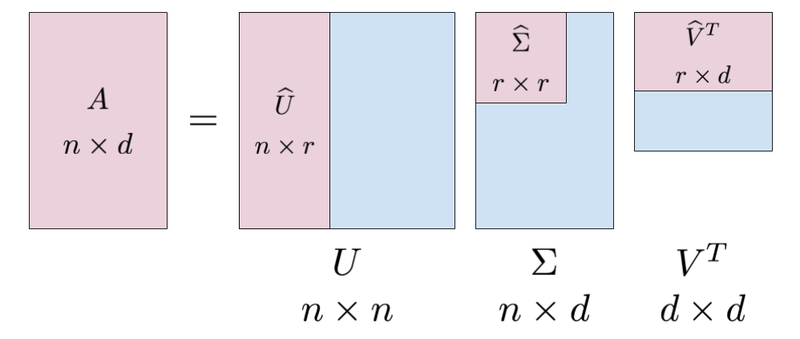

* ## $U$ is an $n × n$ unitary matrix
* ## $Σ$ is a diagonal $n × d$ matrix with non-negative real numbers on the diagonal
* ## $V$ is an $d × d$ unitary matrix  and $V^{T}$ is the transpose of $V$.

### An important decision is choosing the number of factors to factor the user-item matrix. The higher the number of factors, the more precise is the factorization in the original matrix reconstructions. Therefore, if the model is allowed to  memorize too much details of the original matrix, it may not generalize well for data it was not trained on. Reducing the number of factors increases the model generalization.

## Implementation in Python

In [ ]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

# Loading data: CI&T Deskdrop dataset

* ### In this section, we load the Data, which contains a real sample of 12 months logs (Mar'16 - Feb'17) from CI&T's Internal Communication platform (DeskDrop). It contains about 73k logged users interactions on more than 3k public articles shared in the platform. CI&T is a nearshore information technology and software engineering company based out of Brazil

## <u> shared_articles.csv </u>

* This file contains information about the articles shared in the platform. Each article has its sharing date (timestamp), the original url, title, content in plain text, the article' lang (Portuguese: pt or English: en) and information about the user who shared the article (author).



* There are two possible event types at a given timestamp - (i) CONTENT SHARED: The article was shared in the platform and is available for users (ii) CONTENT REMOVED: The article was removed from the platform and not available for further recommendation.



* For the sake of simplicity, we only consider here the "CONTENT SHARED" event type, assuming (naively) that all articles were available during the whole one year period. For a more precise evaluation (and higher accuracy), only articles that were available at a given time should be recommended, but we let this exercice for you.

In [ ]:
articles_df = pd.read_csv('data/shared_articles.csv')
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
articles_df.head()

timestamp       eventType            contentId       authorPersonId  \
1  1459193988  CONTENT SHARED -4110354420726924665  4340306774493623681   
2  1459194146  CONTENT SHARED -7292285110016212249  4340306774493623681   
3  1459194474  CONTENT SHARED -6151852268067518688  3891637997717104548   
4  1459194497  CONTENT SHARED  2448026894306402386  4340306774493623681   
5  1459194522  CONTENT SHARED -2826566343807132236  4340306774493623681   

       authorSessionId authorUserAgent authorRegion authorCountry contentType  \
1  8940341205206233829             NaN          NaN           NaN        HTML   
2  8940341205206233829             NaN          NaN           NaN        HTML   
3 -1457532940883382585             NaN          NaN           NaN        HTML   
4  8940341205206233829             NaN          NaN           NaN        HTML   
5  8940341205206233829             NaN          NaN           NaN        HTML   

                                                 url  \
1  http://www.nytimes.com/2016/03/28/business/dea...   
2  http://cointelegraph.com/news/bitcoin-future-w...   
3  https://cloudplatform.googleblog.com/2016/03/G...   
4  https://bitcoinmagazine.com/articles/ibm-wants...   
5  http://www.coindesk.com/ieee-blockchain-oxford...   

                                               title  \
1  Ethereum, a Virtual Currency, Enables Transact...   
2  Bitcoin Future: When GBPcoin of Branson Wins O...   
3                       Google Data Center 360° Tour   
4  IBM Wants to "Evolve the Internet" With Blockc...   
5  IEEE to Talk Blockchain at Cloud Computing Oxf...   

                                                text lang  
1  All of this work is still very early. The firs...   en  
2  The alarm clock wakes me at 8:00 with stream o...   en  
3  We're excited to share the Google Data Center ...   en  
4  The Aite Group projects the blockchain market ...   en  
5  One of the largest and oldest organizations fo...   en

## <u> users_interactions.csv </u>

This file contains logs of user interactions on shared articles. It can be joined to **articles_shared.csv** by **contentId** column.

The eventType values are:  
- **VIEW**: The user has opened the article. 
- **LIKE**: The user has liked the article. 
- **COMMENT CREATED**: The user created a comment in the article. 
- **FOLLOW**: The user chose to be notified on any new comment in the article. 
- **BOOKMARK**: The user has bookmarked the article for easy return in the future.

In [ ]:
interactions_df = pd.read_csv('/users_interactions.csv')
interactions_df.head()

timestamp eventType            contentId             personId  \
0  1465413032      VIEW -3499919498720038879 -8845298781299428018   
1  1465412560      VIEW  8890720798209849691 -1032019229384696495   
2  1465416190      VIEW   310515487419366995 -1130272294246983140   
3  1465413895    FOLLOW   310515487419366995   344280948527967603   
4  1465412290      VIEW -7820640624231356730  -445337111692715325   

             sessionId                                          userAgent  \
0  1264196770339959068                                                NaN   
1  3621737643587579081  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...   
2  2631864456530402479                                                NaN   
3 -3167637573980064150                                                NaN   
4  5611481178424124714                                                NaN   

  userRegion userCountry  
0        NaN         NaN  
1         NY          US  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN

## <u> Data Munging

###  As there are different interactions types, we associate them with a weight or strength, assuming that, for example, a comment in an article indicates a higher interest of the user on the item than a like, or than a simple view.

In [ ]:
event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

interactions_df['eventStrength'] = interactions_df['eventType'].apply(lambda x: event_type_strength[x])

### Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.  

### For this reason, we are keeping in the dataset only users with at least 5 interactions.

In [ ]:
users_interactions_count_df = interactions_df.groupby(['personId', 'contentId']).size().groupby('personId').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['personId']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 1895
# of users with at least 5 interactions: 1140


In [ ]:
print('# of interactions: %d' % len(interactions_df))
interactions_from_selected_users_df = interactions_df.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'personId',
               right_on = 'personId')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 72312
# of interactions from users with at least 5 interactions: 69868


In [ ]:
interactions_from_selected_users_df.head(10)

timestamp eventType            contentId             personId  \
0  1465413032      VIEW -3499919498720038879 -8845298781299428018   
1  1465413046      VIEW -3499919498720038879 -8845298781299428018   
2  1464190235      VIEW  6437568358552101410 -8845298781299428018   
3  1459429221      VIEW -4760639635023250284 -8845298781299428018   
4  1459274156      VIEW -6142462826726347616 -8845298781299428018   
5  1459274266      VIEW -1672166631728511207 -8845298781299428018   
6  1459274282      VIEW -1672166631728511207 -8845298781299428018   
7  1464878692      VIEW  2601622077116449484 -8845298781299428018   
8  1464878692      VIEW  2601622077116449484 -8845298781299428018   
9  1465481798      LIKE  8890720798209849691 -8845298781299428018   

             sessionId                                          userAgent  \
0  1264196770339959068                                                NaN   
1  1264196770339959068  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
2 -1157447994463607871  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...   
3 -5149610736659242149  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...   
4 -6283148774987755959  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...   
5 -6283148774987755959  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...   
6 -6283148774987755959  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...   
7 -5332595842923867237                                                NaN   
8 -5332595842923867237  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...   
9  2199204395214244565                                                NaN   

  userRegion userCountry  eventStrength  
0        NaN         NaN            1.0  
1         SP          BR            1.0  
2         SP          BR            1.0  
3         SP          BR            1.0  
4         SP          BR            1.0  
5         SP          BR            1.0  
6         SP          BR            1.0  
7        NaN         NaN            1.0  
8         SP          BR            1.0  
9        NaN         NaN            2.0

### In the platform, users are allowed to view an article many times, and interact with them in different ways (eg. like or comment). Thus, to model the user interest on a given article, we aggregate all the interactions the user has performed in an item by a weighted sum of interaction type strength and apply a log transformation to smooth the distribution.

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['personId', 'contentId'])['eventStrength'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 39106


personId            contentId  eventStrength
0 -9223121837663643404 -8949113594875411859       1.000000
1 -9223121837663643404 -8377626164558006982       1.000000
2 -9223121837663643404 -8208801367848627943       1.000000
3 -9223121837663643404 -8187220755213888616       1.000000
4 -9223121837663643404 -7423191370472335463       3.169925

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['personId'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 31284
# interactions on Test set: 7822


In [ ]:
interactions_test_df.head()

personId            contentId  eventStrength
17686  -830175562779396891  5928346445655989915       1.584963
4234  -7267769888748948232  2708089973817733462       2.000000
10478 -3535274684588209118 -1564468014116140117       1.000000
26356  3094513233385472738 -5011709367955107239       1.000000
10894 -3390049372067052505 -6255158415883847921       2.000000

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='personId', 
                                                          columns='contentId', 
                                                          values='eventStrength').fillna(0)

users_items_pivot_matrix_df.head()

contentId             -9222795471790223670  -9216926795620865886  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   2.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId             -9194572880052200111  -9192549002213406534  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   0.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId             -9190737901804729417  -9189659052158407108  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   0.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId             -9176143510534135851  -9172673334835262304  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   0.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId             -9171475473795142532  -9166778629773133902  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   0.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId                     ...            9191014301634017491  \
personId                      ...                                  
-9223121837663643404          ...                            0.0   
-9212075797126931087          ...                            0.0   
-9207251133131336884          ...                            0.0   
-9199575329909162940          ...                            0.0   
-9196668942822132778          ...                            0.0   

contentId              9207286802575546269   9208127165664287660  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   0.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId              9209629151177723638   9209886322932807692  \
personId                                                           
-9223121837663643404                   0.0                   0.0   
-9212075797126931087                   0.0                   0.0   
-9207251133131336884                   0.0                   0.0   
-9199575329909162940                   0.0                   0.0   
-9196668942822132778                   0.0                   0.0   

contentId              9213260650272029784   9215261273565326920  \
personId                                                           
-9223121837663643404                   0.0      

In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[-9223121837663643404,
 -9212075797126931087,
 -9207251133131336884,
 -9199575329909162940,
 -9196668942822132778,
 -9188188261933657343,
 -9172914609055320039,
 -9156344805277471150,
 -9120685872592674274,
 -9109785559521267180]

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(1140, 2926)

In [ ]:
U.shape

(1140, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 2926)

### After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 0.01039915,  0.00081872, -0.01725263, ...,  0.00140708,
         0.0110647 ,  0.00226063],
       [-0.00019285, -0.00031318, -0.00264624, ...,  0.00251658,
         0.00017609, -0.00189488],
       [-0.01254721,  0.0065947 , -0.00590676, ...,  0.00698975,
        -0.01015696,  0.01154572],
       ...,
       [-0.02995379,  0.00805715, -0.01846307, ..., -0.01083078,
        -0.00118591,  0.0096798 ],
       [-0.01845505,  0.00467019,  0.01219602, ...,  0.00409507,
         0.00019482, -0.00752562],
       [-0.01506374,  0.00327732,  0.13391269, ..., -0.01191815,
         0.06422074,  0.01303244]])

In [ ]:
all_user_predicted_ratings.shape

(1140, 2926)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

-9223121837663643404  -9212075797126931087  \
contentId                                                          
-9222795471790223670              0.010399             -0.000193   
-9216926795620865886              0.000819             -0.000313   
-9194572880052200111             -0.017253             -0.002646   
-9192549002213406534              0.035081              0.000391   
-9190737901804729417              0.019939             -0.004799   

                      -9207251133131336884  -9199575329909162940  \
contentId                                                          
-9222795471790223670             -0.012547              0.052958   
-9216926795620865886              0.006595             -0.000649   
-9194572880052200111             -0.005907             -0.003666   
-9192549002213406534             -0.029046             -0.007702   
-9190737901804729417              0.006684              0.006363   

                      -9196668942822132778  -9188188261933657343  \
contentId                                                          
-9222795471790223670             -0.010035             -0.005412   
-9216926795620865886              0.000151              0.000338   
-9194572880052200111              0.021300             -0.001278   
-9192549002213406534              0.017615              0.005496   
-9190737901804729417             -0.001997              0.002356   

                      -9172914609055320039  -9156344805277471150  \
contentId                                                          
-9222795471790223670             -0.003918              0.049302   
-9216926795620865886              0.000197              0.000861   
-9194572880052200111              0.029100             -0.014730   
-9192549002213406534              0.013435              0.057563   
-9190737901804729417              0.003876              0.004118   

                      -9120685872592674274  -9109785559521267180  \
contentId                                                          
-9222795471790223670             -0.013458             -0.020052   
-9216926795620865886              0.002341              0.001765   
-9194572880052200111             -0.023410              0.004950   
-9192549002213406534              0.047532              0.004209   
-9190737901804729417             -0.027098              0.019793   

                              ...            9105269044962898535  \
contentId                     ...                                  
-9222795471790223670          ...                      -0.005306   
-9216926795620865886          ...                       0.000095   
-9194572880052200111          ...                       0.011529   
-9192549002213406534          ...                       0.020149   
-9190737901804729417          ...                       0.003719   

                       9109075639526981934   9135582630122950040  \
contentId                                                          
-9222795471790223670             -0.089463             -0.000048   
-9216926795620865886              0.013915              0.000506   
-9194572880052200111              0.046012              0.010485   
-9192549002213406534              0.260317              0.007923   
-9190737901804729417              0.004478              0.001917   

                       9137372837662939523   9148269800512008413  \
contentId                                                          
-9222795471790223670              0.015023              0.020953   
-9216926795620865886              0.001460              0.014863   
-9194572880052200111              0.018768              0.150362   
-9192549002213406534             -0.008079              0.034164   
-9190737901804729417              0.000341             -0.034535   

                       9165571805999894845   9187866633451383747  \
contentId                                                          
-9222795471790223670             -0.009394             -0.019114   
-9

In [ ]:
len(cf_preds_df.columns)

1140

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['contentId'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'contentId', 
                                                          right_on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, articles_df)

# Evaluation

### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('personId')
interactions_train_indexed_df = interactions_train_df.set_index('personId')
interactions_test_indexed_df = interactions_test_df.set_index('personId')

### The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['contentId']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        all_items = set(articles_df['contentId'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['contentId']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['contentId'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['contentId'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1139 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.33392994119151115, 'recall@10': 0.46803886474047557}


_person_id  hits@10_count  hits@5_count  interacted_count  \
76   3609194402293569455             46            21               192   
17  -2626634673110551643             56            30               134   
16  -1032019229384696495             34            16               130   
10  -1443636648652872475             51            38               117   
82  -2979881261169775358             48            39                88   
161 -3596626804281480007             34            22                80   
65   1116121227607581999             32            24                73   
81    692689608292948411             21            16                69   
106 -9016528795238256703             28            20                69   
52   3636910968448833585             30            23                68   

     recall@10  recall@5  
76    0.239583  0.109375  
17    0.417910  0.223881  
16    0.261538  0.123077  
10    0.435897  0.324786  
82    0.545455  0.443182  
161   0.425000  0.275000  
65    0.438356  0.328767  
81    0.304348  0.231884  
106   0.405797  0.289855  
52    0.441176  0.338235

Evaluating the Collaborative Filtering model (SVD matrix factorization), we observe that we got **Recall@5 (33%)** and **Recall@10 (46%)** 

In [ ]:
index = 3
int(index in range(0, 5))

1

In [ ]:
index in range(0, 5)

True